# 1. 


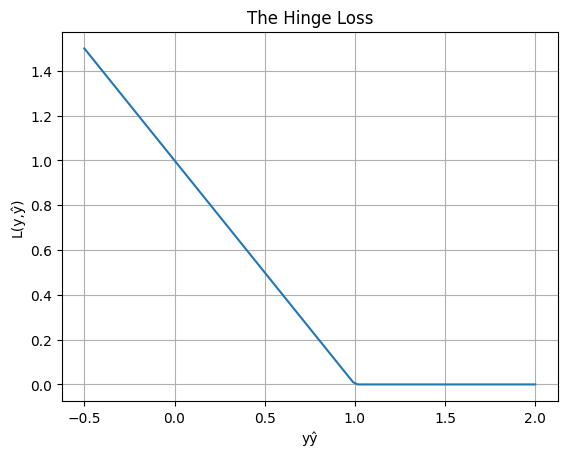

In [1]:
import numpy as np
import matplotlib.pyplot as plt

yy = np.linspace(-0.5, 2, 100)
hinge_loss = np.maximum(0, 1 - yy)

plt.plot(yy, hinge_loss)
plt.xlabel('yŷ')
plt.ylabel('L(y,ŷ)')
plt.title('The Hinge Loss')
plt.grid()

# 2.

In [2]:
# Pulled directly from Week3_notebook.ipynb to get UCI 1/7 data
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split

# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
features = optical_recognition_of_handwritten_digits.data.features 
labels = optical_recognition_of_handwritten_digits.data.targets 

X = features.to_numpy()
y = labels.to_numpy().flatten()

X_small = X[np.logical_or(y==1, y==7), :]
y_small = y[np.logical_or(y==1, y==7)]


##### My own code
y_small = np.where(y_small == 1,-1,1) # Need to make negative so cvxpy can cast correctly
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=0)
X = X_train
y = y_train

In [3]:
import cvxpy as cvx

# Initialize variables
C = 1.0 #Using same C as lecture
n, p = X.shape
beta = cvx.Variable(p)  
beta0 = cvx.Variable()

# Objective function of hinge loss
hinge_loss = cvx.maximum(0,1-cvx.multiply(y, X @ beta + beta0))
objective = cvx.Minimize(0.5*cvx.sum_squares(beta) + C*cvx.sum(hinge_loss))

# Solve
problem = cvx.Problem(objective)
problem.solve()

print(beta.value)
print(beta0.value)

[ 0.          0.00872695  0.04574511  0.00877716  0.0283236   0.00200651
 -0.01903044  0.01069386  0.          0.03638611  0.06216494  0.01746487
  0.00937961  0.00341923 -0.00560225  0.00348417  0.         -0.0025389
 -0.0049167  -0.08567669 -0.06232118  0.01208975  0.0115942   0.
  0.         -0.01866863 -0.01278988 -0.03358867 -0.00929365  0.01899944
  0.02677647  0.          0.          0.01342044  0.00888606  0.02838828
  0.02628529 -0.00658609  0.02177639  0.          0.          0.04946276
 -0.00851576 -0.03702851  0.0080628  -0.01288236  0.0245431   0.
  0.          0.00407548 -0.04406115 -0.03562718 -0.0587001  -0.0610806
 -0.00381214  0.          0.         -0.00241309  0.00461872 -0.03051918
 -0.07339719 -0.04310873 -0.02013893  0.        ]
2.131766874241817


# 3.

In [6]:
from sklearn.svm import SVC
model = SVC(C = 1.0, kernel='linear', gamma = 1.0)
model.fit(X, y)

#From Week3_notebook.ipynb
print(model.coef_[0])
print(model.intercept_[0])

[ 0.          0.0087222   0.04572927  0.00875418  0.02829762  0.00201332
 -0.01904274  0.01069569  0.          0.03640886  0.06217738  0.01746922
  0.0093522   0.00340871 -0.0056485   0.00348954  0.         -0.00257692
 -0.00494424 -0.08568646 -0.06232685  0.01209853  0.01160958  0.
  0.         -0.01868201 -0.01277512 -0.03360973 -0.00929525  0.01899143
  0.02678054  0.          0.          0.01340932  0.00887977  0.0283834
  0.02628528 -0.006609    0.02178471  0.          0.          0.04944775
 -0.00850151 -0.03705816  0.00805995 -0.01290189  0.02456075  0.
  0.          0.00408295 -0.04402932 -0.0356237  -0.05869025 -0.06108945
 -0.0037861   0.          0.         -0.00241166  0.00461925 -0.03048097
 -0.07336975 -0.04310995 -0.02013894  0.        ]
2.1332200701238007


# 4.

In [7]:
from sklearn.model_selection import GridSearchCV

# Parameters and code taken from link in homework (scikit-learn.org)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]} # Added 100 
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='accuracy')
clf.fit(X, y)

print("Best parameters found:", clf.best_params_)

Best parameters found: {'C': 10, 'kernel': 'rbf'}


# 5. (Extra Credit)

Yes, the graph is convex. It's very similar to the standard loss function but with a curve to it.


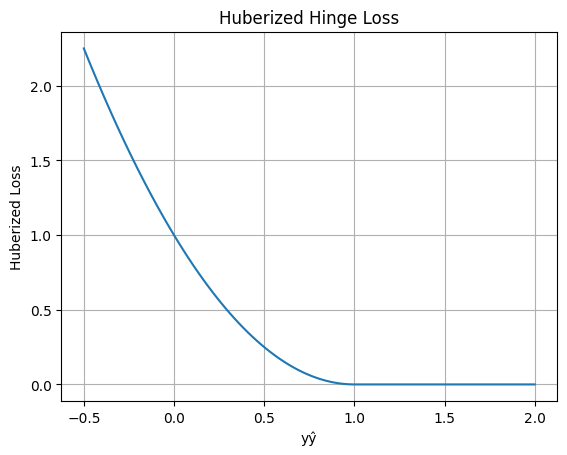

In [8]:
def huberized_loss(yy):
    loss = np.where(yy < -1, -4*yy, np.maximum(0, 1 - yy)**2)
    return loss

yy = np.linspace(-0.5, 2, 100)
loss_vals = huberized_loss(yy)

plt.plot(yy, loss_vals)
plt.title("Huberized Hinge Loss")
plt.ylabel("Huberized Loss")
plt.xlabel('yŷ')
plt.grid()

print("Yes, the graph is convex. It's very similar to the standard loss function but with a curve to it.")

In [9]:
C = 1.0

n, p = X.shape
beta = cvx.Variable(p)  
beta0 = cvx.Variable()


# Objective function using Huberized Loss
yy = cvx.multiply(y, X @ beta + beta0)
hub_loss = cvx.maximum(-4*yy, cvx.maximum(0,1-yy)**2)

objective = cvx.Minimize(0.5*cvx.sum_squares(beta) + C*cvx.sum(hub_loss))

# Solve
problem = cvx.Problem(objective)
problem.solve()

print(beta.value)
print(beta0.value)

[ 0.00000000e+00  8.70936291e-03  4.57225930e-02  8.73367239e-03
  2.82246698e-02  2.03626662e-03 -1.89941737e-02  1.06924600e-02
  0.00000000e+00  3.63921994e-02  6.20960219e-02  1.73876397e-02
  9.34270878e-03  3.45359808e-03 -5.59369264e-03  3.50358384e-03
 -1.22153978e-10 -2.53594987e-03 -4.98435172e-03 -8.55945213e-02
 -6.21863858e-02  1.20292559e-02  1.15607074e-02  2.51977718e-10
 -5.72465337e-11 -1.86341034e-02 -1.27838013e-02 -3.35280420e-02
 -9.32649615e-03  1.89144093e-02  2.67312140e-02  0.00000000e+00
  0.00000000e+00  1.33347831e-02  8.87930535e-03  2.83789432e-02
  2.62042874e-02 -6.53652053e-03  2.17936162e-02  0.00000000e+00
  0.00000000e+00  4.93697045e-02 -8.49840482e-03 -3.70318539e-02
  8.00768980e-03 -1.29015668e-02  2.44914617e-02  0.00000000e+00
  0.00000000e+00  4.07365635e-03 -4.39610317e-02 -3.56026950e-02
 -5.86078792e-02 -6.09976574e-02 -3.81824358e-03  6.77959113e-10
  0.00000000e+00 -2.41916179e-03  4.64695911e-03 -3.03173048e-02
 -7.32617192e-02 -4.30489